In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('clean.csv')

# Validation

Some ``mloc`` labels are not valid. Let's try to correct that.

<AxesSubplot:>

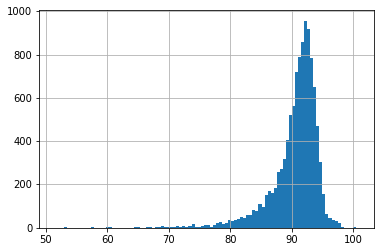

In [3]:
df.LAB_L[df.mloc=='dmin'].hist(bins=100)

<AxesSubplot:>

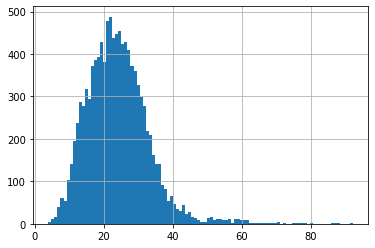

In [4]:
df.LAB_L[df.mloc=='dmax'].hist(bins=100)

In [5]:
df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).groupby('mloc').agg(np.median)

,LAB_L
mloc,
dmax,0.290733
dmin,0.065200


Okay, so now we have some estimates for where the variance _should_ be within a ``catloc``. Let's find violations of that.

In [6]:
tmp = df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).reset_index()

In [7]:
tmp = tmp[tmp.mloc=='dmax'].sort_values('LAB_L',ascending=False)

In [8]:
for cat in tmp.cat:
    t = df[df.cat==cat]
    mlocs = list(t.mloc.unique())
    if len(mlocs)==1:
        print(cat)

5532h
4790s
1023k
5464oo
294u


In [9]:
df.mloc[(df.cat=='5532h')&(df.LAB_L > 30)] = 'dmin'

In [10]:
df.mloc[(df.cat=='4790s')&(df.LAB_L > 30)] = 'dmin'

In [11]:
tmp = df[['cat','LAB_L','mloc']].groupby(['cat','mloc']).agg(np.var).reset_index()
tmp = tmp[tmp.mloc=='dmin'].sort_values('LAB_L',ascending=False)

In [12]:
for cat in tmp.cat:
    t = df[df.cat==cat]
    mlocs = list(t.mloc.unique())
    if len(mlocs)==1:
        print(cat,mlocs,len(t))

1023l ['dmin'] 3
5514y ['dmin'] 3
5513y ['dmin'] 3


The following cull is not about validity, but since I want to look at dmax and dmin measurements for the same papers, the following papers (which could not be measured for both) are not useful.

In [13]:
badcats = []
tmp = df[df.mloc.isin(['dmax','dmin'])]
for cat in tmp.cat.unique():
    t = tmp[tmp.cat==cat]
    mlocs = list(t.mloc.unique())
    if len(mlocs)==1:
        badcats.append(cat)

In [14]:
df = df[~df.cat.isin(badcats)]

In [15]:
df.mloc.value_counts()

dmin    10788
dmax    10787
Name: mloc, dtype: int64

In [16]:
tmp = df[df.mloc.isin(['dmax','dmin'])]
for cat in tmp.cat.unique():
    t = tmp[tmp.cat==cat]
    l = list(set(list(t.mloc.value_counts())))
    if len(l)!=1:
        print(cat)

285c


In [17]:
df = df[df.cat!='285c']

In [18]:
df.mloc.value_counts()

dmax    10785
dmin    10785
Name: mloc, dtype: int64

### mtrial issue

In [20]:
df['catrial'] = [df.cat.loc[i] + "_" + str(df.mtrial.loc[i]) for i in df.index]

In [21]:
df.mtrial[(df.catrial=='2372p_2')&(df.mloc=='dmax')] = '1'
df.mtrial[(df.catrial=='2372p_3')&(df.mloc=='dmax')] = '2'

In [23]:
df['catrial'] = [df.cat.loc[i] + "_" + str(df.mtrial.loc[i]) for i in df.index]

### save

In [24]:
df.to_csv('valid.csv',index=False)